# Real vs fake news prediction model

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
from sklearn.linear_model import SGDClassifier, LogisticRegression

## Read in datasets

In [2]:
real_df = pd.read_csv('~/documents/Data/Fake vs Real News/real_eng.csv', index_col = 0)
fake_df = pd.read_csv('~/documents/Data/Fake vs Real News/fake_eng.csv', index_col = 0)

## Transform data to correct format for sklearn modelling

#### Add a column to specify whether an article is real or fake

In [3]:
real_df['real_or_fake'] = 'real'
fake_df['real_or_fake'] = 'fake'

#### Concatenate the two articles into a single dataframe

In [4]:
news_df = pd.concat([real_df, fake_df])

#### Shuffle the rows of the dataframe

In [5]:
news_df = news_df.sample(frac = 1, random_state = 42)

In [6]:
news_df.sample(frac=1).head()

,title,text,length_title,proportion_capitals_title,real_or_fake
1684,Trump SLAMS Canada By Using Example Border St...,It can easily be said that Donald Trump doesn ...,91,0.241758,fake
12691,Rebels kill 15 peacekeepers in Congo in worst ...,"GOMA, Democratic Republic of Congo (Reuters) -...",78,0.051282,real
12203,Exclusive: Italy plans big handover of sea res...,ROME/TRIPOLI (Reuters) - Italy wants Libya s c...,70,0.042857,real
6945,Taiwan says contact with Trump agreed ahead of...,TAIPEI (Reuters) - The telephone call between ...,71,0.028169,real
8014,KARMA: Conservative Group’s Plan To Sabotage ...,Thanks to a conservative group that tried to r...,93,0.301075,fake


#### Feature and target columns

In [7]:
X = news_df[['length_title', 'proportion_capitals_title']]
y = news_df['real_or_fake']

#### Standardise the feature columns

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Split the data into a training set and a testing set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

## Logistic Regression Classifier

#### Fit the model to the dataset

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#### Model accuracy

In [11]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9892610585527998


#### Confusion matrix

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1722   25]
 [  17 2147]]


## K-Nearest Neighbours Classifier

#### Set up the hyperparameter space for tuning

In [13]:
k_space = np.arange(2, 20, 2)

#### Initialise the cross-validation scores array

In [14]:
cv_scores = []

#### Fit the model to the dataset

In [15]:
tic = time.perf_counter()
for k in k_space:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

10.0 seconds


#### Model accuracy

    k  Cross-validation scores
0   2                 0.979513
1   4                 0.983832
2   6                 0.984514
3   8                 0.985025
4  10                 0.985196
5  12                 0.984997
6  14                 0.985651
7  16                 0.985281
8  18                 0.985253


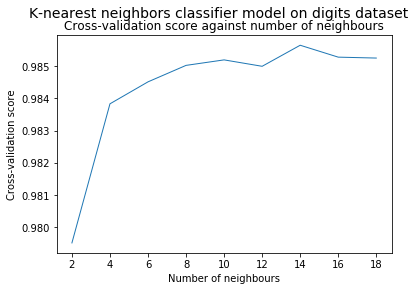

In [16]:
print(pd.DataFrame({'k': k_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(k_space, cv_scores, linewidth = 1)
plt.suptitle('K-nearest neighbors classifier model on digits dataset', size = 14)
plt.title('Cross-validation score against number of neighbours')
plt.xlabel('Number of neighbours')
plt.ylabel('Cross-validation score')
plt.xticks(k_space)
plt.show()

#### Best model

In [17]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### Best model score

In [18]:
score = accuracy_score(y_test, y_pred)
print(score)

0.988238302224495


#### Best model confusion matrix

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1730   17]
 [  29 2135]]


## Support vector machine classifier

#### Set up the hyperparameter space for tuning

In [20]:
C_space = np.arange(0.01, 0.05, 0.005)

#### Initialise the cross-validation scores array

In [21]:
cv_scores = []

#### Fit the model to the dataset

In [22]:
tic = time.perf_counter()
for C in C_space:
    svc = svm.LinearSVC(C = C, max_iter = 2000)
    cv_score = np.mean(cross_val_score(svc, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

2.0 seconds


#### Model accuracy

       C  Cross-validation scores
0  0.010                 0.984997
1  0.015                 0.985139
2  0.020                 0.985167
3  0.025                 0.985281
4  0.030                 0.985281
5  0.035                 0.985196
6  0.040                 0.985196
7  0.045                 0.985196


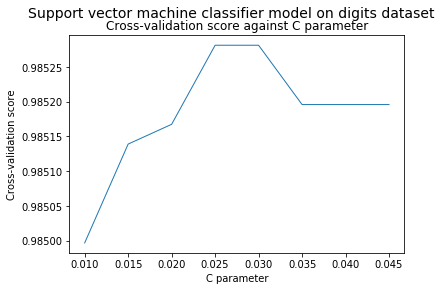

In [23]:
print(pd.DataFrame({'C': C_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(C_space, cv_scores, linewidth = 1)
plt.suptitle('Support vector machine classifier model on digits dataset', size = 14)
plt.title('Cross-validation score against C parameter')
plt.xlabel('C parameter')
plt.ylabel('Cross-validation score')
plt.show()

#### Best model

In [24]:
svc = svm.LinearSVC(C = 0.025, max_iter = 2000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

#### Best model score

In [25]:
score = accuracy_score(y_test, y_pred)
print(score)

0.989516747634876


#### Best model confusion matrix

In [26]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1722   25]
 [  16 2148]]


# Stochastic gradient descent classifier

#### Set up the hyperparameter space for tuning

In [27]:
alpha_space = np.arange(5e-6, 2e-5, 1e-6)

#### Initialise the cross-validation scores array

In [28]:
cv_scores = []

#### Fit the model to the dataset

In [29]:
tic = time.perf_counter()
for a in alpha_space:
    sgdc = SGDClassifier(alpha = a)
    cv_score = np.mean(cross_val_score(sgdc, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

5.0 seconds


#### Model accuracy

       alpha  Cross-validation scores
0   0.000005                 0.984116
1   0.000006                 0.984287
2   0.000007                 0.984514
3   0.000008                 0.984486
4   0.000009                 0.984514
5   0.000010                 0.984287
6   0.000011                 0.984343
7   0.000012                 0.984855
8   0.000013                 0.984770
9   0.000014                 0.983605
10  0.000015                 0.984656
11  0.000016                 0.983718
12  0.000017                 0.984997
13  0.000018                 0.983491
14  0.000019                 0.984940
15  0.000020                 0.984144


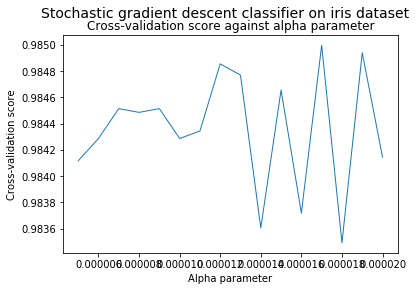

In [30]:
print(pd.DataFrame({'alpha': alpha_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(alpha_space, cv_scores, linewidth = 1)
plt.suptitle('Stochastic gradient descent classifier on iris dataset', size = 14)
plt.title('Cross-validation score against alpha parameter')
plt.xlabel('Alpha parameter')
plt.ylabel('Cross-validation score')
plt.show()

#### Best model

In [31]:
sgdc = SGDClassifier(alpha = 1.5e-5)
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)

#### Best model score

In [32]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9890053694707236


#### Best model confusion matrix

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1724   23]
 [  20 2144]]


## Decision tree classifier

#### Set up the parameter space

In [34]:
max_depth_space = np.arange(1, 12, 1)

#### Initialise the cross-validation scores array

In [35]:
cv_scores = []

#### Fit the model to the dataset

In [36]:
tic = time.perf_counter()
for d in max_depth_space:
    dec_tree = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = np.mean(cross_val_score(dec_tree, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

3.0 seconds


#### Model accuracy

    max_depth  Cross-validation scores
0           1                 0.982070
1           2                 0.982070
2           3                 0.984372
3           4                 0.984940
4           5                 0.985167
5           6                 0.985025
6           7                 0.984969
7           8                 0.984770
8           9                 0.984628
9          10                 0.984372
10         11                 0.984486


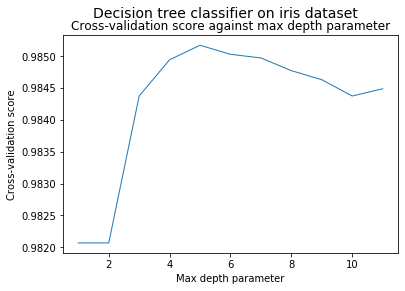

In [37]:
print(pd.DataFrame({'max_depth': max_depth_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(max_depth_space, cv_scores, linewidth = 1)
plt.suptitle('Decision tree classifier on iris dataset', size = 14)
plt.title('Cross-validation score against max depth parameter')
plt.xlabel('Max depth parameter')
plt.ylabel('Cross-validation score')
plt.show()

#### Best model

In [38]:
dec_tree = tree.DecisionTreeClassifier(max_depth = 5)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

#### Best model score

In [39]:
score = accuracy_score(y_test, y_pred)
print(score)

0.986959856814114


#### Best model confusion matrix

In [40]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1732   15]
 [  36 2128]]
